In [9]:
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import numpy as np
import linmix
np.random.seed(2)

In [10]:
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['legend.fontsize'] = 30
mpl.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 16
plt.rcParams['xtick.minor.size'] = 9
plt.rcParams['ytick.major.size'] = 16
plt.rcParams['ytick.minor.size'] = 9
plt.rcParams['ytick.minor.size'] = 9
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.minor.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.minor.width'] = 2.5
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.pad'] = 9
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
plt.rcParams['axes.titlesize'] = 20
plt.rcParams.update({'font.size': 30})

In [3]:
egstable = Table.read('D:/EGS.hdf5', path = 'data') 

In [3]:
display(egstable)

<Table length=41457>
   ID   X_IMAGE Y_IMAGE XPEAK_IMAGE ... dim_err_uv_D dim_vj_D dim_err_vj_D
float64 float64 float64   float64   ...   float32    float64    float32   
------- ------- ------- ----------- ... ------------ -------- ------------
    1.0 8137.73 2741.43      8138.0 ...       0.0434 0.639391       0.1653
    2.0 10012.2  2746.0     10011.0 ...       0.0434 0.639391       0.1653
    3.0 8009.83 2750.23      8010.0 ...       0.0434 0.639391       0.1653
    4.0 7973.97 2753.15      7974.0 ...       0.0434 0.639391       0.1653
    5.0 9361.62  2754.1      9361.0 ...       0.0434 0.639391       0.1653
    6.0 10057.8  2755.1     10058.0 ...       0.0434 0.639391       0.1653
    7.0 8130.94 2750.49      8132.0 ...       0.0434 0.639391       0.1653
    8.0 8145.52 2761.31      8145.0 ...       0.0434 0.639391       0.1653
    9.0 8158.68 2752.26      8157.0 ...       0.0434 0.639391       0.1653
   10.0 8171.94 2777.13      8168.0 ...       0.0434 0.639391       0.1653
    ...     ...     ...         ... ...          ...      ...          ...
41448.0 28190.2 9275.59     28190.0 ...       0.0434 0.639391       0.1653
41449.0 33797.5 9740.71     33798.0 ...       0.0434 0.639391       0.1653
41450.0 40118.4  9794.0     40119.0 ...       0.0434 0.639391       0.1653
41451.0 34376.8 9945.47     34377.0 ...       0.0434 0.639391       0.1653
41452.0 23229.0 9192.45     23229.0 ...       0.0434 0.639391       0.1653
41453.0 39817.3 9760.51     39817.0 ...       0.0434 0.639391       0.1653
41454.0 38462.7 10172.3     38462.0 ...       0.0434 0.639391       0.1653
41455.0 32359.3 9737.24     32359.0 ...       0.0434 0.639391       0.1653
41456.0 23436.3 9319.72     23436.0 ...       0.0434 0.639391       0.1653
41457.0 35866.5 9213.28     35866.0 ...       0.0434 0.639391       0.1653

In [6]:
data_dict= dict()
for obj in egstable:
    for key in ['id3DHST' , 'RA', 'DEC' ,  'ir_SFR-ladder_total' , 'td_Av' , 'td_z_best' , 'td_z_spec' , 'td_z_best_s' , 'td_z_peak_phot' ,'td_lmass' ,'ir_SFR-UV_corr' , 'ir_SFR-UV_corr_Error','ir_SFR-IR', 'ir_UV_beta' , 'td_Ha_FLUX' , 'td_Ha_FLUX_ERR' , 'td_Hb_FLUX' , 'td_Hb_FLUX_ERR']:
        data_dict.setdefault(key, list()).append(obj[key])

egsdf = pd.DataFrame(data_dict)
egsdf = egsdf[egsdf['td_z_best'] <= 2.9]
#GNtabledf = GNtabledf[GNtabledf['td_z_best'] >= 1.3]


In [59]:
np.random.rand()

0.8895200639461449

In [8]:
egsdf['RAND_NC'] = np.random.uniform(0 , 1 , len(egsdf))
egsdf['RAND_NS'] = np.random.uniform(0 , 1 , len(egsdf))

In [9]:
egsdf.to_csv('egsdf.csv' , index = False)

In [2]:
egsdf = pd.read_csv('egsdf.csv')

In [3]:
display(egsdf)

,id3DHST,RA,DEC,ir_SFR-ladder_total,td_Av,td_z_best,td_z_spec,td_z_best_s,td_z_peak_phot,td_lmass,ir_SFR-UV_corr,ir_SFR-UV_corr_Error,ir_SFR-IR,ir_UV_beta,td_Ha_FLUX,td_Ha_FLUX_ERR,td_Hb_FLUX,td_Hb_FLUX_ERR,RAND_NC,RAND_NS
0,-99,215.301100,53.051206,2.459610,1.1,-1.0000,-1.0,0,0.0100,7.51,2.459610,0.287657,-31.670500,-0.6032,-99.0,-99.0,-99.0,-99.0,0.435995,0.616807
1,7,215.267143,53.027553,50.075000,0.0,0.0424,-1.0,3,0.0424,6.26,50.075000,1.597690,-1245.660000,-1.4705,-99.0,-99.0,-99.0,-99.0,0.025926,0.371920
2,8,215.303227,53.052918,0.379861,0.0,0.8557,-1.0,3,0.8557,8.08,0.379861,0.051130,-9.454850,-0.7237,-99.0,-99.0,-99.0,-99.0,0.549662,0.278211
3,9,215.303814,53.053403,0.007647,0.0,0.1806,-1.0,3,0.1806,6.95,0.007647,0.000018,-0.857021,-2.0526,-99.0,-99.0,-99.0,-99.0,0.435322,0.769281
4,11,215.266129,53.027076,0.161120,1.2,0.9720,-1.0,3,0.9720,8.49,0.161120,0.016755,-3.962170,-1.6216,-99.0,-99.0,-99.0,-99.0,0.420368,0.288054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37496,37682,214.893867,52.929846,0.000846,0.0,0.8386,-1.0,3,0.8386,8.21,0.000846,0.000327,-0.179450,1.7886,-99.0,-99.0,-99.0,-99.0,0.283492,0.918034
37497,40669,214.586367,52.724885,0.837820,0.0,1.9987,-1.0,3,1.9987,8.38,0.837820,0.004507,-34.593600,-2.1182,-99.0,-99.0,-99.0,-99.0,0.617510,0.114795
37498,-99,214.719360,52.819636,0.066354,1.1,-1.0000,-1.0,0,0.0100,7.51,0.066354,0.009128,-10.843000,-1.5073,-99.0,-99.0,-99.0,-99.0,0.918354,0.693007
37499,38663,214.887474,52.928586,0.506428,0.0,1.3511,-1.0,3,1.3511,7.60,0.506428,0.019134,-33.826300,-2.1998,-99.0,-99.0,-99.0,-99.0,0.179108,0.013631


In [4]:
ncarea = 96.8
egsarea = 70.5*10.1
nslim = 3*10**(-18)
nclim = 8*10**(-18)

dlz1 = cosmo.luminosity_distance(0.3).value
lumnsz1 = nslim * 4 * np.pi * dlz1**2 * 9.521 * 10**(48) 
lumncz1 = nclim * 4 * np.pi * dlz1**2 * 9.521 * 10**(48) 
pabsfrnsz1= np.log10(lumnsz1) - 40.02
pabsfrncz1= np.log10(lumncz1) - 40.02 
paasfrnsz1= np.log10(lumnsz1) - 40.34 
paasfrncz1= np.log10(lumncz1) - 40.34

dlz2 = cosmo.luminosity_distance(0.85).value
lumnsz2 = nslim * 4 * np.pi * dlz2**2 * 9.521 * 10**(48) 
lumncz2 = nclim * 4 * np.pi * dlz2**2 * 9.521 * 10**(48) 
pabsfrnsz2= np.log10(lumnsz2) - 40.02
pabsfrncz2= np.log10(lumncz2) - 40.02 
paasfrnsz2= np.log10(lumnsz2) - 40.34 
paasfrncz2= np.log10(lumncz2) - 40.34

dlz3 = cosmo.luminosity_distance(1.35).value
lumnsz3 = nslim * 4 * np.pi * dlz3**2 * 9.521 * 10**(48) 
lumncz3 = nclim * 4 * np.pi * dlz3**2 * 9.521 * 10**(48) 
pabsfrnsz3= np.log10(lumnsz3) - 40.02
pabsfrncz3= np.log10(lumncz3) - 40.02 
paasfrnsz3= np.log10(lumnsz3) - 40.34 
paasfrncz3= np.log10(lumncz3) - 40.34

dlz4 = cosmo.luminosity_distance(1.85).value
lumnsz4 = nslim * 4 * np.pi * dlz4**2 * 9.521 * 10**(48) 
lumncz4 = nclim * 4 * np.pi * dlz4**2 * 9.521 * 10**(48) 
pabsfrnsz4= np.log10(lumnsz4) - 40.02
pabsfrncz4= np.log10(lumncz4) - 40.02 
paasfrnsz4= np.log10(lumnsz4) - 40.34 
paasfrncz4= np.log10(lumncz4) - 40.34

display(paasfrnsz1)

-1.3917817329873046

In [5]:
nz1 = len(egsdf['td_lmass'][(egsdf.td_z_best < 0.6) & (egsdf.td_z_best > 0.01) & (np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz1) & (egsdf.td_lmass > 7.75)])
nz2 = len(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1) & (np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz2) & (egsdf.td_lmass > 7.75)])
nz3 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6) & (np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz3) & (egsdf.td_lmass > 7.75)])
nz4 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1) & (np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz4) & (egsdf.td_lmass > 7.75)])
ntot = nz1 + nz2 + nz3 + nz4
display(nz1)
display(nz2)
display(nz3)
display(nz4)
display(ntot)
display(nz1/(ntot))
display(nz2/(ntot))
display(nz3/(ntot))
display(nz4/(ntot))
display(150 * nz1/ntot)
display(150 * nz2/ntot)
display(150 * nz3/ntot)
display(150 * nz4/ntot)
display(150 * nz1/ntot/nz1)
display(150 * nz2/ntot/nz2)
display(150 * nz3/ntot/nz3)
display(150 * nz4/ntot/nz4)

C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


1741

2784

2588

2161

9274

0.18772913521673495

0.3001940910071167

0.27905973689885705

0.23301703687729136

28.159370282510245

45.0291136510675

41.858960534828555

34.9525555315937

0.016174250593055856

0.016174250593055856

0.016174250593055856

0.016174250593055856

In [8]:
display(len(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > 4.5*paasfrncz2)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)]))
display(len(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > 4.5*pabsfrncz3)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)]))

106

0

C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


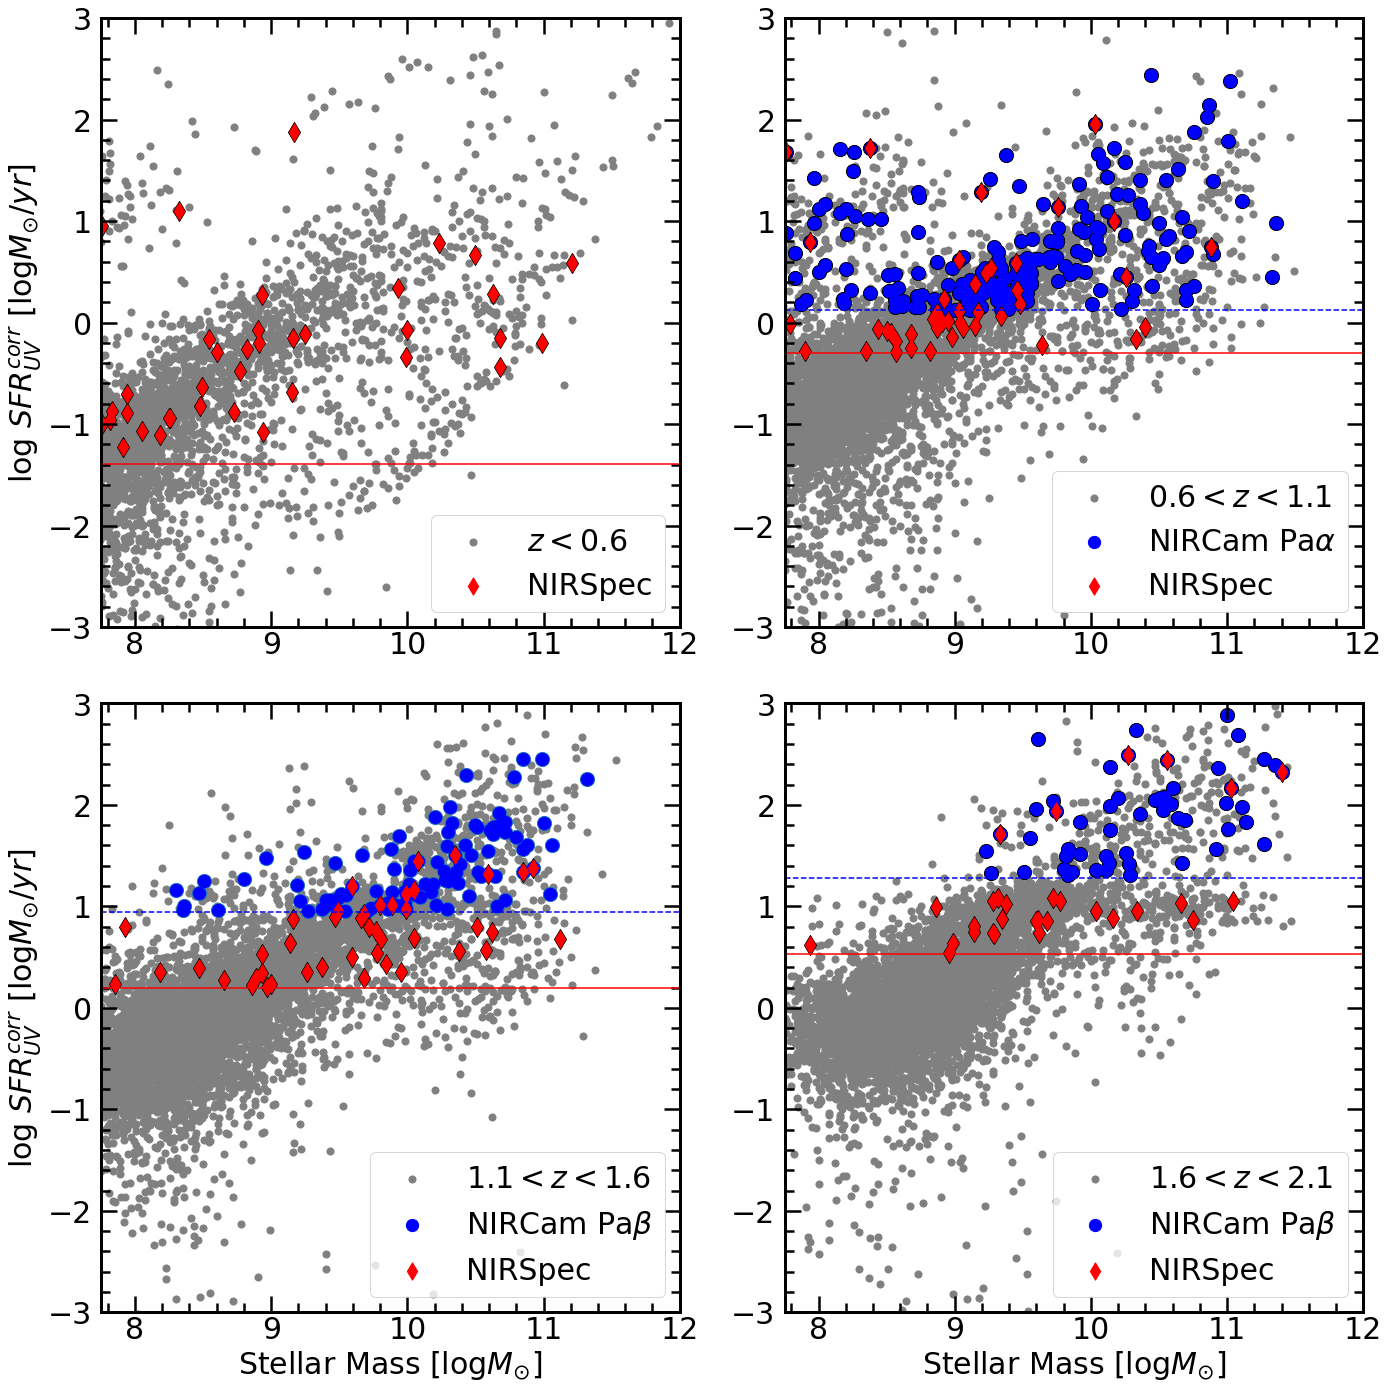

In [17]:
fig = plt.figure(figsize = (20 , 20) , tight_layout = True)
gs = GridSpec(nrows=2, ncols=2)
#gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_ylabel(r"log $SFR_{UV}^{corr}$ [log$M_{\odot}/yr$]")
#ax0.set_xlabel('Stellar Mass [log$M_{\odot}$]')
y0 = ax0.scatter(egsdf['td_lmass'][egsdf.td_z_best < 0.6] , np.log10(egsdf['ir_SFR-UV_corr'][egsdf.td_z_best < 0.6]) , s=50 , c = 'gray' ,  label = r'$z < 0.6$')
ax0.scatter(egsdf['td_lmass'][(egsdf.td_z_best < 0.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz1)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz1)&(egsdf.td_z_best < 0.6)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)]) , s=200 , c = 'black' , marker = 'd')
ax0.scatter(egsdf['td_lmass'][(egsdf.td_z_best < 0.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz1)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz1)&(egsdf.td_z_best < 0.6)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)]) , s=150 , c = 'red' , marker = 'd' , label = r'NIRSpec')
ax0.plot([7.75 , 12] , [paasfrnsz1 , paasfrnsz1] , 'r')
#ax0.plot([7.75 , 12] , [paasfrncz1 , paasfrncz1] , 'r--')
#ax0.plot([7.75 , 12] , [pabsfrnsz1 , pabsfrnsz1] , 'b')
#ax0.plot([7.75 , 12] , [pabsfrncz1 , pabsfrncz1] , 'b--')
ax0.axis([7.75 , 12 , -3 , 3])
ax0.legend(loc = 'lower right')

ax1 = fig.add_subplot(gs[0:1, 1:2])
#ax1.set_ylabel(r"log $SFR_{UV}^{corr}$ [log$M_{\odot}/yr$]")
#ax1.set_xlabel('Stellar Mass [log$M_{\odot}$]')
y1 = ax1.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)]) , s=50 , c = 'gray' ,  label = r'$0.6 < z < 1.1$')
ax1.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrncz2)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrncz2)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)]) , s=200 , c = 'black' )
ax1.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrncz2)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrncz2)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)]) , s=150 , c = 'blue' ,  label = r'NIRCam Pa$\alpha$')
ax1.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz2)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz2)&(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)]) , s=200 , marker = 'd', c = 'black')
ax1.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz2)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz2)&(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)]) , s=150 , marker = 'd', c = 'red' ,  label = r'NIRSpec')
ax1.plot([7.75 , 12] , [paasfrnsz2 , paasfrnsz2] , 'r')
ax1.plot([7.75 , 12] , [paasfrncz2 , paasfrncz2] , 'b--')
#ax1.plot([7.75 , 12] , [pabsfrnsz2 , pabsfrnsz2] , 'b')
#ax1.plot([7.75 , 12] , [pabsfrncz2 , pabsfrncz2] , 'b--')
ax1.axis([7.75 , 12 , -3 , 3])
ax1.legend(loc = 'lower right')
#ax1.tick_params(labelleft = False)

ax2 = fig.add_subplot(gs[1:2, 0:1])
ax2.set_ylabel(r"log $SFR_{UV}^{corr}$ [log$M_{\odot}/yr$]")
ax2.set_xlabel('Stellar Mass [log$M_{\odot}$]')
y2 = ax2.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)]) , s=50 , c = 'gray' ,  label =r'$1.1 < z < 1.6$')
ax2.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz3)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz3)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)]) , s=200 )
ax2.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz3)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz3)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)]) , s=200 ,marker = 'd' , c = 'black'   )
ax2.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz3)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz3)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)]) , s=150 , c = 'blue' ,  label = r'NIRCam Pa$\beta$')
ax2.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz3)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz3)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)]) , s=150 , marker = 'd' ,c = 'red' ,  label = r'NIRSpec')
ax2.plot([7.75 , 12] , [paasfrnsz3 , paasfrnsz3] , 'r')
#ax2.plot([7.75 , 12] , [paasfrncz3 , paasfrncz3] , 'r--')
#ax2.plot([7.75 , 12] , [pabsfrnsz3 , pabsfrnsz3] , 'b')
ax2.plot([7.75 , 12] , [pabsfrncz3 , pabsfrncz3] , 'b--')
ax2.axis([7.75 , 12 , -3 , 3])
ax2.legend(loc = 'lower right')
#ax2.tick_params(labelleft = False)

ax3 = fig.add_subplot(gs[1:2, 1:2])
#ax3.set_ylabel(r"log $SFR_{UV}^{corr}$ [log$M_{\odot}/yr$]")
ax3.set_xlabel('Stellar Mass [log$M_{\odot}$]')
y3 = ax3.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)]) , s=50 , c = 'gray' ,  label =r'$1.6 < z < 2.1$')
ax3.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz4)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz4)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)]) , s=200 , c = 'black')
ax3.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz4)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz4)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)]) , s=200 , marker = 'd' , c = 'black' )
ax3.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz4)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz4)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)]) , s=150 , c = 'blue' ,  label = r'NIRCam Pa$\beta$')
ax3.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz4)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz4)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)]) , s=150 , marker = 'd' , c = 'red' ,  label = r'NIRSpec')
#ax3.scatter(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrncz4)&(egsdf.RAND_NC < ncarea/egsarea)] , np.log10(egsdf['ir_SFR-UV_corr'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrncz4)&(egsdf.RAND_NC < ncarea/egsarea)]) , s=100 , c = 'red' ,  label = r'NIRCam Pa$\alpha$')
ax3.plot([7.75 , 12] , [paasfrnsz4 , paasfrnsz4] , 'r')
#ax3.plot([7.75 , 12] , [paasfrncz4 , paasfrncz4] , 'r--')
#ax3.plot([7.75 , 12] , [pabsfrnsz4 , pabsfrnsz4] , 'b')
ax3.plot([7.75 , 12] , [pabsfrncz4 , pabsfrncz4] , 'b--')
ax3.axis([7.75 , 12 , -3 , 3])
ax3.legend(loc = 'lower right')

# ax3 = fig.add_subplot(gs[0:1,1:9])
# fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
# ax3.xaxis.set_label_position('top')
#ax0.set_yscale('log')
plt.show()

In [8]:
nspecz1 = len(egsdf['td_lmass'][(egsdf.td_z_best < 0.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz1)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)])
nspecz2 = len(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz2)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)])
nspecz3 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz3)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)])
nspecz4 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz4)&(egsdf.RAND_NC < 0.016) & (egsdf.td_lmass > 7.75)])
ncamz2 = len(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrncz2)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)])
ncamz3 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz3)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)])
ncamz4 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz4)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_lmass > 7.75)])
ncamtot = ncamz2 + ncamz3 + ncamz4

C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
display(ncamz2)
display(ncamz3)
display(ncamz4)
display(ncamtot)

216

99

54

369

In [10]:
hansz1 = len(egsdf['td_lmass'][(egsdf.td_z_best < 0.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz1)&(egsdf.RAND_NC < 0.016) & (egsdf.td_Ha_FLUX/egsdf.td_Ha_FLUX_ERR > 3)])

hancz2 = len(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrncz2)&(egsdf.RAND_NC < ncarea/egsarea) & (egsdf.td_Ha_FLUX/egsdf.td_Ha_FLUX_ERR > 3)])
hansz2 = len(egsdf['td_lmass'][(egsdf.td_z_best > 0.6) & (egsdf.td_z_best < 1.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz2)&(egsdf.RAND_NC < 0.016) & (egsdf.td_Ha_FLUX/egsdf.td_Ha_FLUX_ERR > 3)] )

hancz3 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz3)&(egsdf.RAND_NC < ncarea/egsarea)& (egsdf.td_Ha_FLUX/egsdf.td_Ha_FLUX_ERR > 3)])
hansz3 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.1) & (egsdf.td_z_best < 1.6)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz3)&(egsdf.RAND_NC < 0.016)& (egsdf.td_Ha_FLUX/egsdf.td_Ha_FLUX_ERR > 3)])

hancz4 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > pabsfrncz4)&(egsdf.RAND_NC < ncarea/egsarea)& (egsdf.td_Ha_FLUX/egsdf.td_Ha_FLUX_ERR > 3)])
hansz4 = len(egsdf['td_lmass'][(egsdf.td_z_best > 1.6) & (egsdf.td_z_best < 2.1)&(np.log10(egsdf['ir_SFR-UV_corr']) > paasfrnsz4)&(egsdf.RAND_NC < 0.016)& (egsdf.td_Ha_FLUX/egsdf.td_Ha_FLUX_ERR > 3)] )

In [11]:
display(hansz1)
display(hansz2)
display(hancz2)
display(hansz3)
display(hancz3)
display(hansz4)
display(hancz4)
hanstot = hansz1 + hansz2 + hansz3 + hansz4
hanctot = hancz2 + hancz3 + hancz4
hatot = hansz1 + hansz2 + hancz2 + hansz3 + hancz3 + hansz4 + hancz4

display(hanstot)
display(hanctot)
display(hatot)

1

17

74

12

40

0

1

30

115

145